## Capstone Project:

### Data Modeling

## **1. Getting the data**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings #to ignore warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

divide split train test
check balance on the dataset

Decision Trees, Random forest, logistic regression, KNN

In [2]:
# Upload the dataset
wildfire = pd.read_csv("wildfire_final.csv")

In [3]:
print("First 5 values of the dataset.")
wildfire.head()

print("Last 5 values of the dataset.")
wildfire.tail()

First 5 values of the dataset.


,size_class,general_cause_desc,det_agent,discovered_date,dispatch_date,fire_spread_rate,temperature,relative_humidity,wind_direction,wind_speed,...,fire_type_Ground,fire_type_Surface,fire_position_on_slope_Flat,fire_position_on_slope_Lower 1/3,fire_position_on_slope_Middle 1/3,fire_position_on_slope_Upper 1/3,weather_conditions_over_fire_CB Wet,weather_conditions_over_fire_Clear,weather_conditions_over_fire_Cloudy,weather_conditions_over_fire_Rainshowers
0,A,7,0,0.0,0,0.0,4.0,65.0,8,30.0,...,0,1,1,0,0,0,0,0,1,0
1,B,3,0,2.0,0,0.0,12.0,30.0,7,2.0,...,0,1,1,0,0,0,0,0,1,0
2,B,11,0,0.0,0,0.0,12.0,26.0,7,14.0,...,0,1,1,0,0,0,0,1,0,0
3,A,14,5,26.0,0,0.0,6.0,50.0,8,5.0,...,0,1,1,0,0,0,0,0,1,0
4,A,10,0,27.0,0,0.0,7.0,45.0,8,5.0,...,1,0,0,0,1,0,0,0,1,0


Last 5 values of the dataset.


,size_class,general_cause_desc,det_agent,discovered_date,dispatch_date,fire_spread_rate,temperature,relative_humidity,wind_direction,wind_speed,...,fire_type_Ground,fire_type_Surface,fire_position_on_slope_Flat,fire_position_on_slope_Lower 1/3,fire_position_on_slope_Middle 1/3,fire_position_on_slope_Upper 1/3,weather_conditions_over_fire_CB Wet,weather_conditions_over_fire_Clear,weather_conditions_over_fire_Cloudy,weather_conditions_over_fire_Rainshowers
20514,A,4,0,16.0,0,0.0,23.0,55.0,5,10.0,...,0,1,0,0,1,0,0,1,0,0
20515,A,11,6,16.0,0,0.0,26.6,35.0,5,8.0,...,0,1,1,0,0,0,0,1,0,0
20516,A,4,0,29.0,0,0.0,16.0,45.0,6,5.0,...,0,1,1,0,0,0,0,1,0,0
20517,A,4,8,0.0,0,0.0,18.0,45.0,8,10.0,...,1,0,1,0,0,0,0,1,0,0
20518,C,14,8,32.0,0,1.0,9.0,43.0,7,2.0,...,1,0,1,0,0,0,0,1,0,0


Will drop the fire start year as it is not relevant for predicting future outcomes.

In [4]:
# Drop uc_hectares
wildfire = wildfire.drop(columns='fire_start_year')

In [5]:
# Size of the dataset
print("The dataset has",wildfire.shape[0], 'data records and',wildfire.shape[1],'attributes.')

The dataset has 20519 data records and 44 attributes.


## **2. Analysis Preparation**

#### 2.1 Train Test Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# Separate the predictors and outcome attributes
X = wildfire.drop(columns='size_class')
y = wildfire['size_class']

In [8]:
train_X, valid_X, train_y, valid_y = train_test_split(X,y, test_size = 0.2, random_state = 31)

In [9]:
valid_y.value_counts()

A    2950
B    1012
C      93
D      25
E      24
Name: size_class, dtype: int64

In [10]:
train_y.value_counts()

A    11835
B     3905
C      477
E      104
D       94
Name: size_class, dtype: int64

#### 2.2 Applying SMOTE: Synthetic Minority Oversampling Technique

In [11]:
pip install imbalanced-learn

In [12]:
from imblearn.over_sampling import SMOTE

In [13]:
# Create a SMOTE instance
smote = SMOTE(random_state=15)

In [14]:
# Fit and apply SMOTE
sm_X, sm_y = smote.fit_resample(train_X, train_y)

In [15]:
import matplotlib.pyplot as plt

<Figure size 1200x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Before SMOTE')

(array([11835.,     0.,   477.,     0.,     0.,  3905.,     0.,   104.,
            0.,    94.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'Class')

Text(0, 0.5, 'Count')

<Axes: >

Text(0.5, 1.0, 'After SMOTE')

(array([11835.,     0., 11835.,     0.,     0., 11835.,     0., 11835.,
            0., 11835.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'Class')

Text(0, 0.5, 'Count')

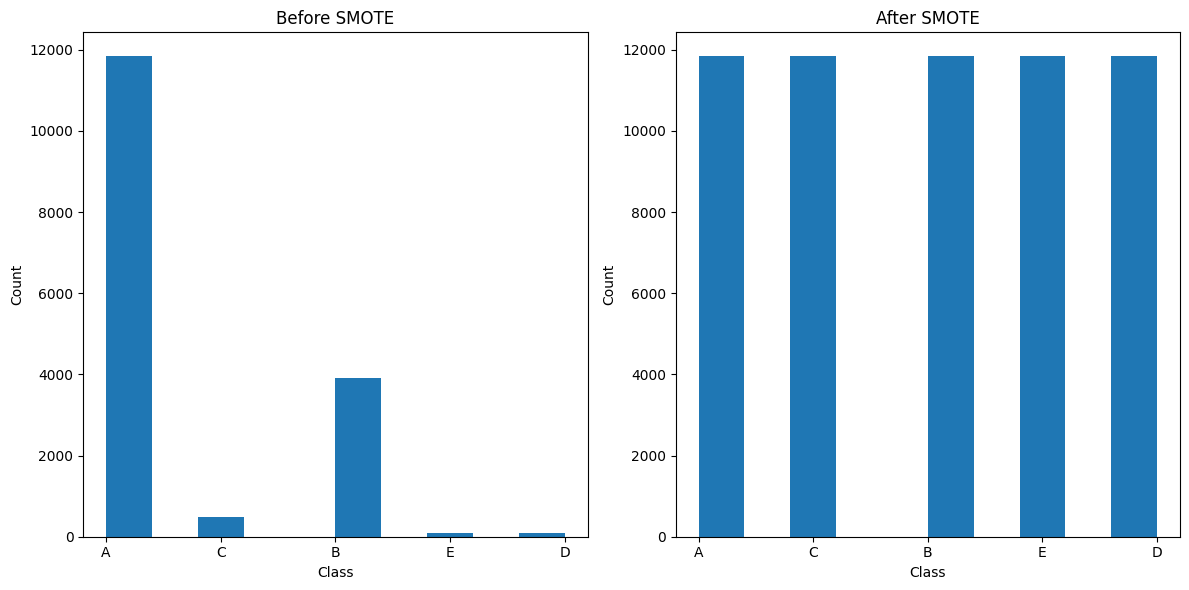

In [16]:
# Visualize the before and after SMOTE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Before SMOTE')
plt.hist(train_y)
plt.xlabel('Class')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
plt.title('After SMOTE')
plt.hist(sm_y)
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

The training dataset has been successfully balanced using SMOTE, ensuring equal representation of classes for improved model training.

## **3. Modelling**

#### 3.1 Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import  confusion_matrix , accuracy_score

Check the attributes split by three layers of the tree structure for distribution analysis.

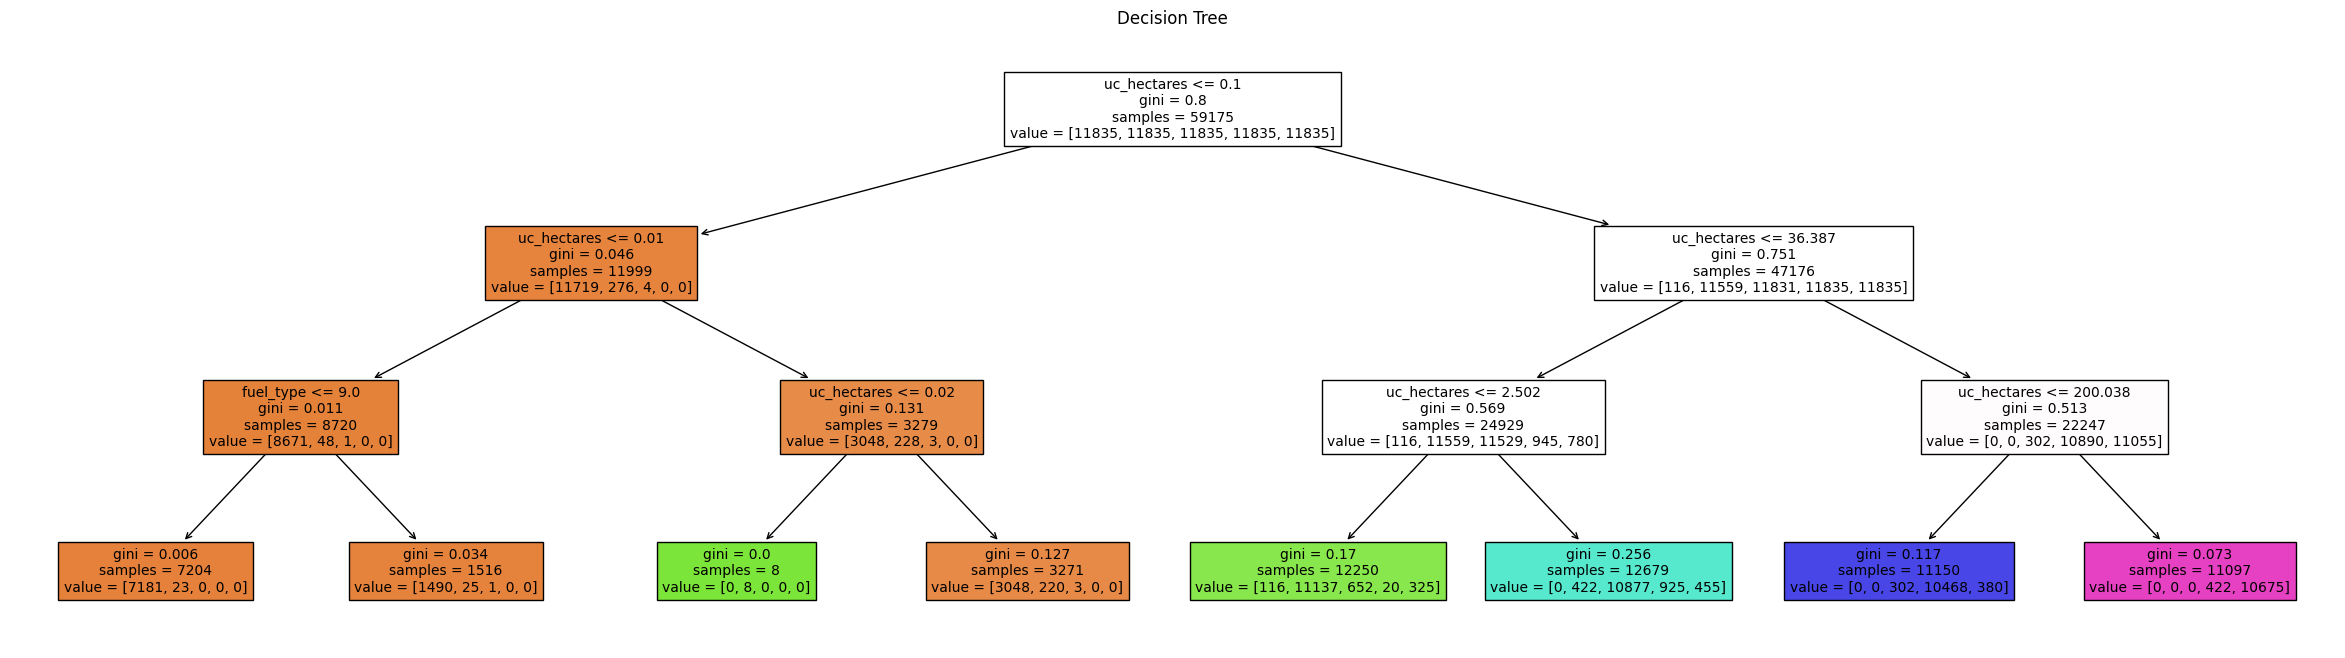

In [18]:
dt = DecisionTreeClassifier(max_depth=3)
fig=plt.figure(figsize=(30,8))
tree.plot_tree(decision_tree=dt.fit(sm_X, sm_y),feature_names=X.columns, filled=True,fontsize=10);
plt.title('Decision Tree');

The splits primarily emphasize uc_hectares, as it measures size similar to our target variable, hence, I'll exclude it from analysis.

In [19]:
# Drop uc_hectares
sm_X = sm_X.drop(columns='uc_hectares')
valid_X = valid_X.drop(columns='uc_hectares')
train_X = train_X.drop(columns='uc_hectares')

In [20]:
# Check the 3 Levels Splits for changes
dt_3 = DecisionTreeClassifier(max_depth=3)
dt_3.fit(sm_X,sm_y)
dt_3_pred = dt_3.predict(valid_X)

DecisionTreeClassifier(max_depth=3)

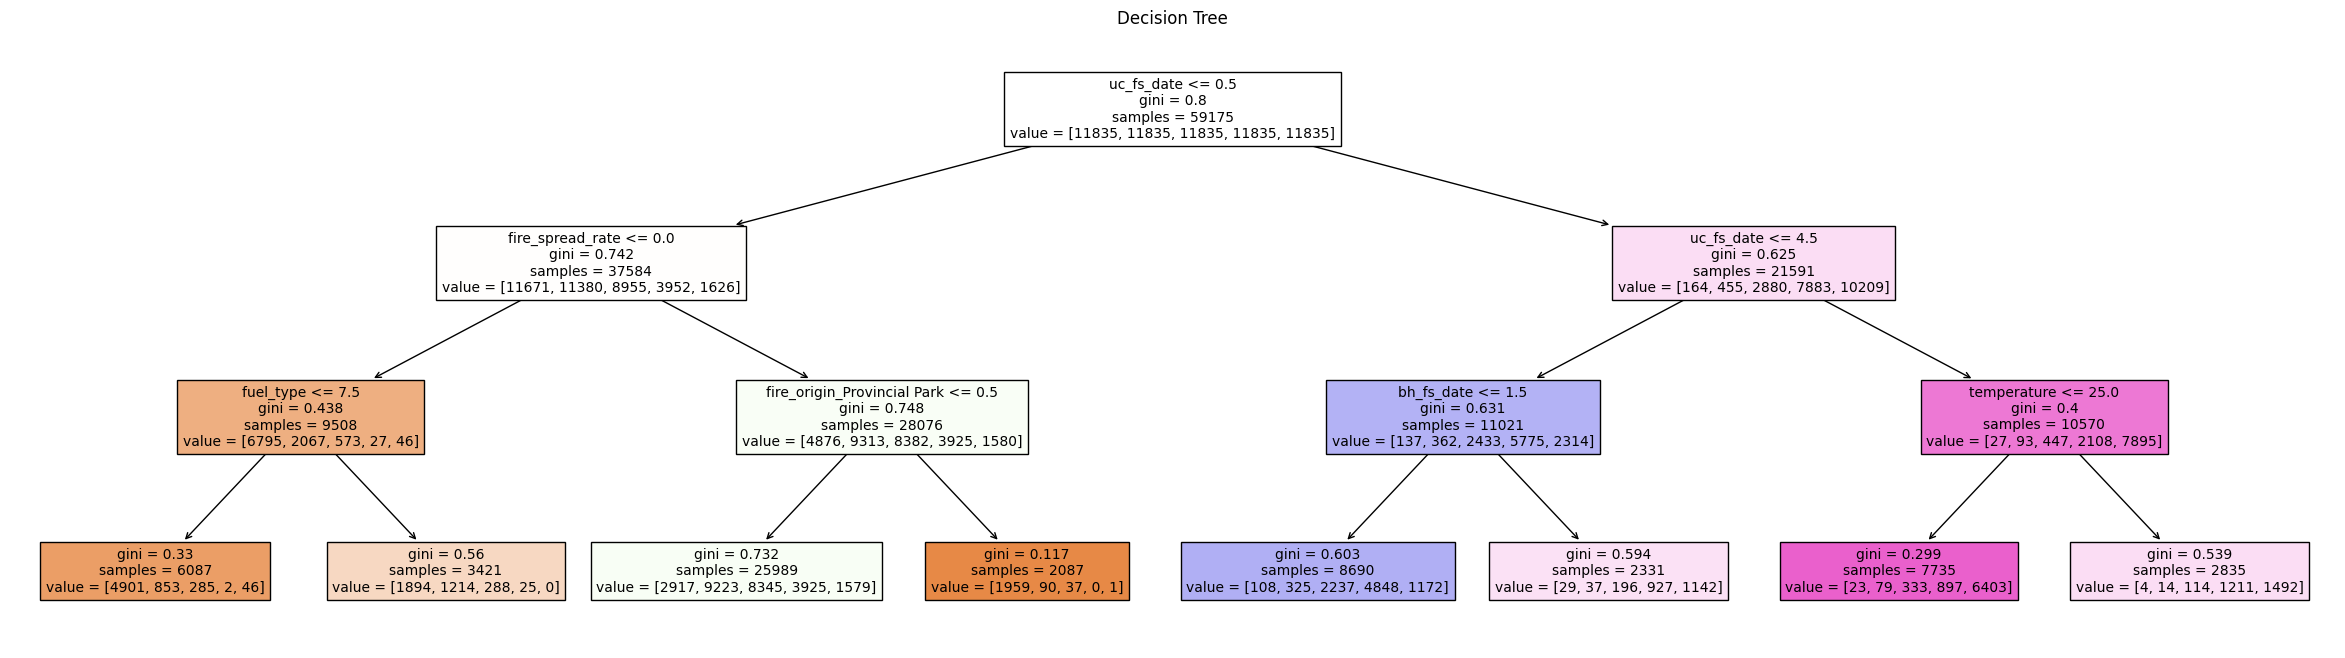

In [21]:
fig=plt.figure(figsize=(30,8))
tree.plot_tree(decision_tree=dt_3.fit(sm_X, sm_y),feature_names=X.columns, filled=True,fontsize=10);
plt.title('Decision Tree');

Now more attributes are contributing to the split.

In [22]:
# Check Accuracy Score
dt_3_accuracy = accuracy_score(valid_y, dt_3_pred)*100
dt_3_accuracy

69.42007797270955

##### Decision Tree with 5 levels

In [23]:
dt_5 = DecisionTreeClassifier(max_depth = 5)
dt_5.fit(sm_X,sm_y)
dt_5_pred = dt_5.predict(valid_X)
# Accuracy Score
dt_5_accuracy = accuracy_score(valid_y,dt_5_pred)*100
print("\nAccuracy Score:",dt_5_accuracy)

DecisionTreeClassifier(max_depth=5)


Accuracy Score: 65.61890838206628


##### Decision Tree with 7 levels

In [24]:
dt_7 = DecisionTreeClassifier(max_depth = 7)
dt_7.fit(sm_X,sm_y)
dt_7_pred = dt_7.predict(valid_X)
# Accuracy Score
dt_7_accuracy = accuracy_score(valid_y,dt_7_pred)*100
print("\nAccuracy Score:",dt_7_accuracy)

DecisionTreeClassifier(max_depth=7)


Accuracy Score: 67.5682261208577


##### Cross Validation

In [25]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [26]:
param_grid = {'max_depth':[3,5,7,10,15,17,20],
              'min_samples_split':[0.07,0.05,0.01,0.005],
              'min_impurity_decrease':[0.05,0.02,0.01,0.001]}

In [27]:
gridsearch = GridSearchCV(DecisionTreeClassifier(random_state=1),param_grid,
                          cv=5, n_jobs=-1)

In [28]:
gridsearch.fit(sm_X, sm_y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10, 15, 17, 20],
                         'min_impurity_decrease': [0.05, 0.02, 0.01, 0.001],
                         'min_samples_split': [0.07, 0.05, 0.01, 0.005]})

In [29]:
gridsearch.best_params_

{'max_depth': 15, 'min_impurity_decrease': 0.001, 'min_samples_split': 0.005}

Using the parameters in Cross Validation

In [30]:
dt_cv = DecisionTreeClassifier(max_depth= 15, min_impurity_decrease= 0.001, min_samples_split= 0.005)
dt_cv.fit(sm_X,sm_y)
dt_cv_pred = dt_cv.predict(valid_X)
# Accuracy Score
dt_cv_accuracy = accuracy_score(valid_y,dt_cv_pred)*100
print("\nAccuracy Score:",dt_cv_accuracy)

DecisionTreeClassifier(max_depth=15, min_impurity_decrease=0.001,
                       min_samples_split=0.005)


Accuracy Score: 66.8615984405458


Compare accuracy score:

In [31]:
data_dt = {'Model': ['3 levels', '5 levels', '7 levels', 'best parameters'],
        'Accuracy Score': [dt_3_accuracy,dt_5_accuracy,dt_7_accuracy, dt_cv_accuracy]}

dt_score = pd.DataFrame(data_dt)

<Figure size 1000x500 with 0 Axes>

Text(0.5, 1.0, 'Decisicion Tree Accuracy Score\n\n')

Text(0, 0.5, 'Accuracy %')

Text(0.5, 0, 'Model')

Text(0, 70.42007797270955, '69.42%')

Text(1, 66.61890838206628, '65.62%')

Text(2, 68.5682261208577, '67.57%')

Text(3, 67.8615984405458, '66.86%')

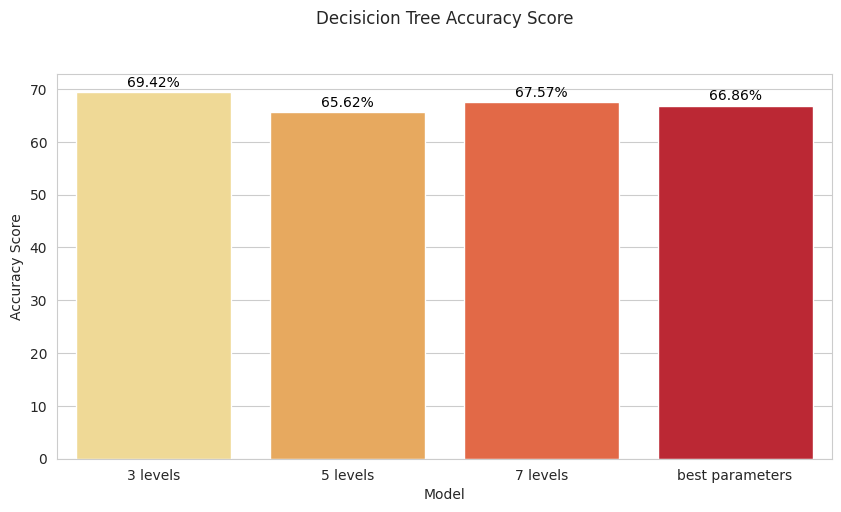

In [32]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
plt.title('Decisicion Tree Accuracy Score\n\n')
plt.ylabel("Accuracy %")
plt.xlabel("Model")
barplot = sns.barplot(x='Model', y='Accuracy Score', data=dt_score, palette='YlOrRd')
for index, row in dt_score.iterrows():
    barplot.text(index, row['Accuracy Score'] + 1, f'{row["Accuracy Score"]:.2f}%', ha='center', va='baseline', fontsize=10, color='black')
plt.show()

The 3 levels has the highest accuracy score with 69.42% accuracy, even after doing cross validation.

---



In [33]:
# Confusion Matrix
dt_cm = confusion_matrix(valid_y,dt_3_pred)

Text(0.5, 1.0, 'Decision Trees Confusion Matrix\n\n')

Text(0.5, 23.52222222222222, 'Predicted Values')

Text(50.722222222222214, 0.5, 'Actual Values')

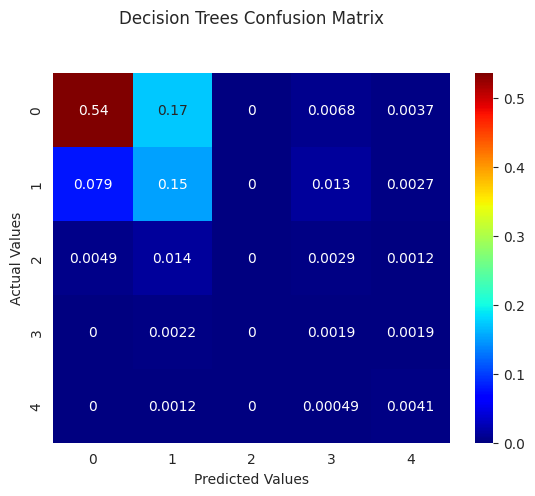

In [34]:
ax = sns.heatmap(dt_cm/np.sum(dt_cm), annot=True, cmap='jet')

ax.set_title('Decision Trees Confusion Matrix\n\n')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')

plt.show()

#### 3.2 Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rf = RandomForestClassifier(n_estimators=500)

In [37]:
rf.fit(sm_X,sm_y)

RandomForestClassifier(n_estimators=500)

In [38]:
rf_pred = rf.predict(valid_X)
rf_accuracy = accuracy_score(valid_y,rf_pred)*100
rf_accuracy

77.14424951267057

Confusion Matrix

In [39]:
rf_cm = confusion_matrix(valid_y, rf_pred)

Text(0.5, 1.0, 'Random Forest Confusion Matrix\n\n')

Text(0.5, 23.52222222222222, 'Predicted Values')

Text(50.722222222222214, 0.5, 'Actual Values')

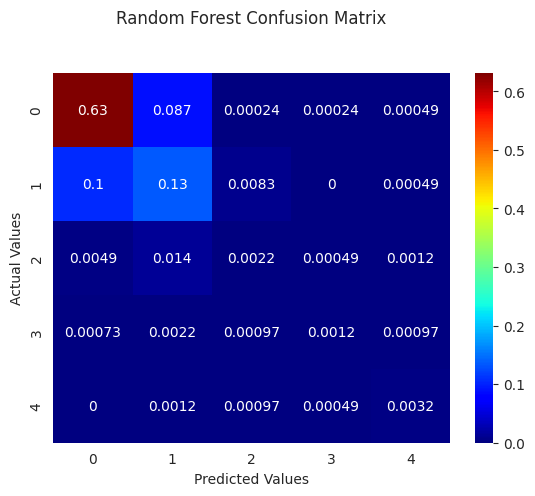

In [40]:
ax = sns.heatmap(rf_cm/np.sum(rf_cm), annot=True, cmap='jet')
ax.set_title('Random Forest Confusion Matrix\n\n');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');
plt.show()

#### 3.3 KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
knn = KNeighborsClassifier(n_neighbors=2)

In [43]:
knn.fit(sm_X, sm_y)

KNeighborsClassifier(n_neighbors=2)

In [44]:
knn_pred = knn.predict(valid_X)

In [45]:
knn_accuracy = accuracy_score(valid_y,knn_pred)*100
knn_accuracy

64.8635477582846

In [46]:
knn_cm = confusion_matrix(valid_y, knn_pred)

Text(0.5, 1.0, 'KNN Matrix\n')

Text(0.5, 23.52222222222222, '\nPredicted Values')

Text(50.722222222222214, 0.5, 'Actual Values')

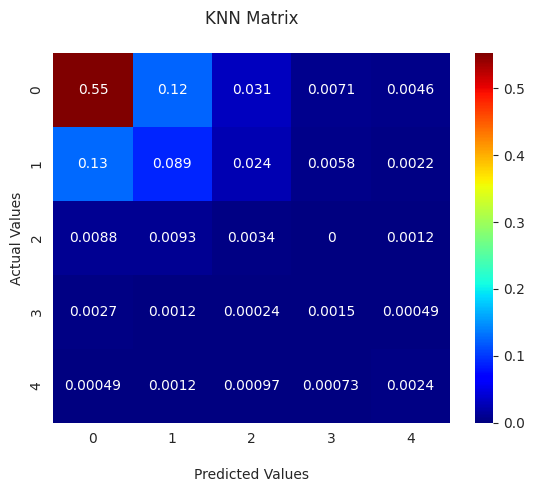

In [47]:
ax = sns.heatmap(knn_cm/np.sum(knn_cm), annot=True, cmap='jet')
ax.set_title('KNN Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');
plt.show()

#### 3.4 Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
log = LogisticRegression()

In [50]:
log.fit(sm_X,sm_y)

LogisticRegression()

In [51]:
log_pred = log.predict(valid_X)

In [52]:
log_accuracy = accuracy_score(valid_y,log_pred)*100
log_accuracy

54.21539961013645

##### With solver = liblinear

In [53]:
log_2 = LogisticRegression(random_state=1, C=1e42, solver='liblinear')
log_2.fit(sm_X,sm_y)

LogisticRegression(C=1e+42, random_state=1, solver='liblinear')

In [54]:
log_2_pred = log_2.predict(valid_X)
log_2_accuracy = accuracy_score(valid_y,log_2_pred)*100
log_2_accuracy

71.90545808966861

Confusion Matrix

In [55]:
log_cm = confusion_matrix(valid_y, log_2_pred)

Text(0.5, 1.0, 'Logistic Regression Confusion Matrix\n\n')

Text(0.5, 23.52222222222222, '\nPredicted Values')

Text(50.722222222222214, 0.5, 'Actual Values')

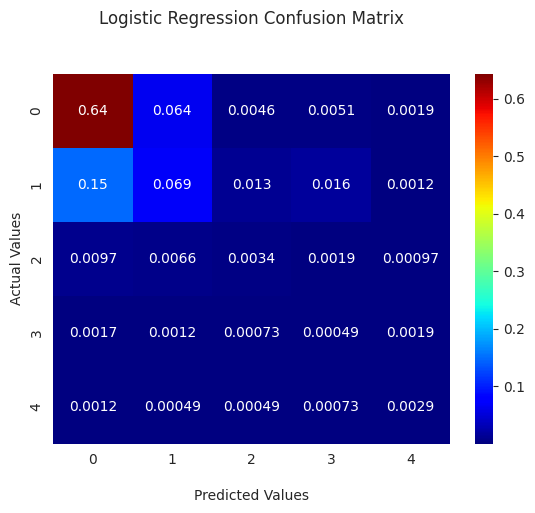

In [56]:
ax = sns.heatmap(log_cm/np.sum(log_cm), annot=True, cmap='jet')

ax.set_title('Logistic Regression Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');

plt.show()

#### 3.5 Gradient Boosting

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

In [58]:
grb = GradientBoostingClassifier()

In [59]:
grb.fit(sm_X, sm_y)

GradientBoostingClassifier()

In [60]:
grb_pred = grb.predict(valid_X)

In [61]:
grb_accuracy = accuracy_score(valid_y,grb_pred)*100
grb_accuracy

74.29337231968812

In [62]:
grb_cm = confusion_matrix(valid_y, grb_pred)

Text(0.5, 1.0, 'Gradient Boosting Confusion Matrix\n')

Text(0.5, 23.52222222222222, 'Predicted Values')

Text(50.722222222222214, 0.5, 'Actual Values')

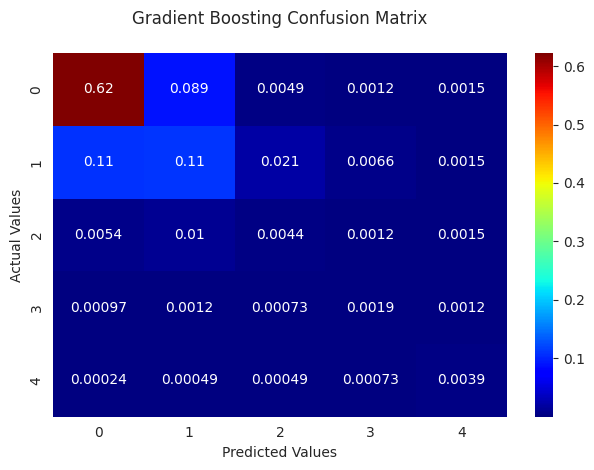

In [63]:
ax = sns.heatmap(grb_cm/np.sum(grb_cm), annot=True, cmap='jet')
ax.set_title('Gradient Boosting Confusion Matrix\n')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
plt.tight_layout()
plt.show()

#### 3.6 Compare Accuracy Score

In [64]:
data = {'Model': ['Decision Tree', 'Random Forest', 'KNN', 'Logistic Regression', 'GradientBoost'],
        'Accuracy Score': [dt_3_accuracy, rf_accuracy, knn_accuracy, log_2_accuracy, grb_accuracy]}

accuracies_score = pd.DataFrame(data)

In [65]:
accuracies_score

,Model,Accuracy Score
0,Decision Tree,69.420078
1,Random Forest,77.144250
2,KNN,64.863548
3,Logistic Regression,71.905458
4,GradientBoost,74.293372


<Figure size 1000x500 with 0 Axes>

Text(0, 0.5, 'Accuracy %')

Text(0.5, 0, 'Model')

Text(0, 70.42007797270955, '69.42%')

Text(1, 78.14424951267057, '77.14%')

Text(2, 65.8635477582846, '64.86%')

Text(3, 72.90545808966861, '71.91%')

Text(4, 75.29337231968812, '74.29%')

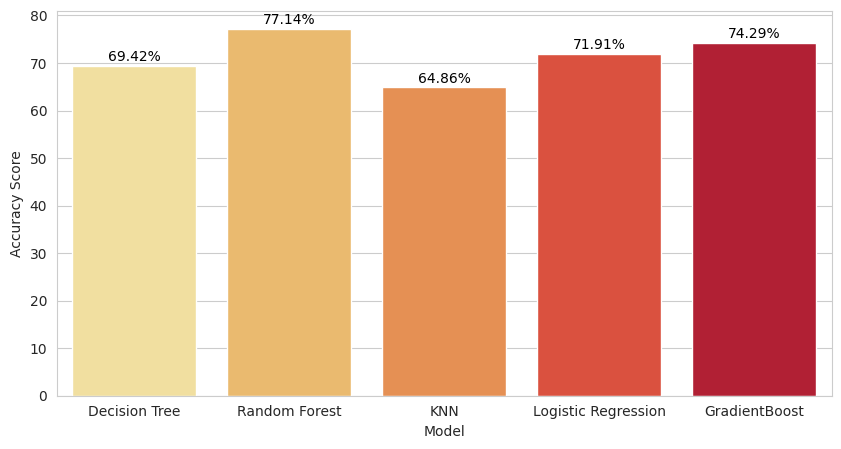

In [66]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
plt.ylabel("Accuracy %")
plt.xlabel("Model")
barplot = sns.barplot(x='Model', y='Accuracy Score', data=accuracies_score, palette='YlOrRd')
for index, row in accuracies_score.iterrows():
    barplot.text(index, row['Accuracy Score'] + 1, f'{row["Accuracy Score"]:.2f}%', ha='center', va='baseline', fontsize=10, color='black')
plt.show()

Our best model is the random forest with 77.49% accuracy

#### 3.7 Feature importance of the best model

In [67]:
importance = rf.feature_importances_

In [68]:
df = pd.DataFrame({'feature':train_X.columns,
                   'importance':importance})
print(df.sort_values('importance', ascending=False))

                                     feature  importance
12                                uc_fs_date    0.123854
4                           fire_spread_rate    0.101653
6                          relative_humidity    0.074385
8                                 wind_speed    0.069684
5                                temperature    0.064652
13                             fire_location    0.052130
7                             wind_direction    0.046117
9                                  fuel_type    0.042372
0                         general_cause_desc    0.041611
14                          fire_start_month    0.040463
11                                bh_fs_date    0.037332
10                         initial_action_by    0.036671
1                                  det_agent    0.035733
2                            discovered_date    0.031132
29             assessment_resource_IA Forces    0.019080
18               fire_origin_Provincial Land    0.017326
33                         fire

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='importance', ylabel='feature'>

Text(0.5, 0, 'importance')

Text(0, 0.5, 'Feature')

Text(0.5, 1.0, 'Feature Importance')

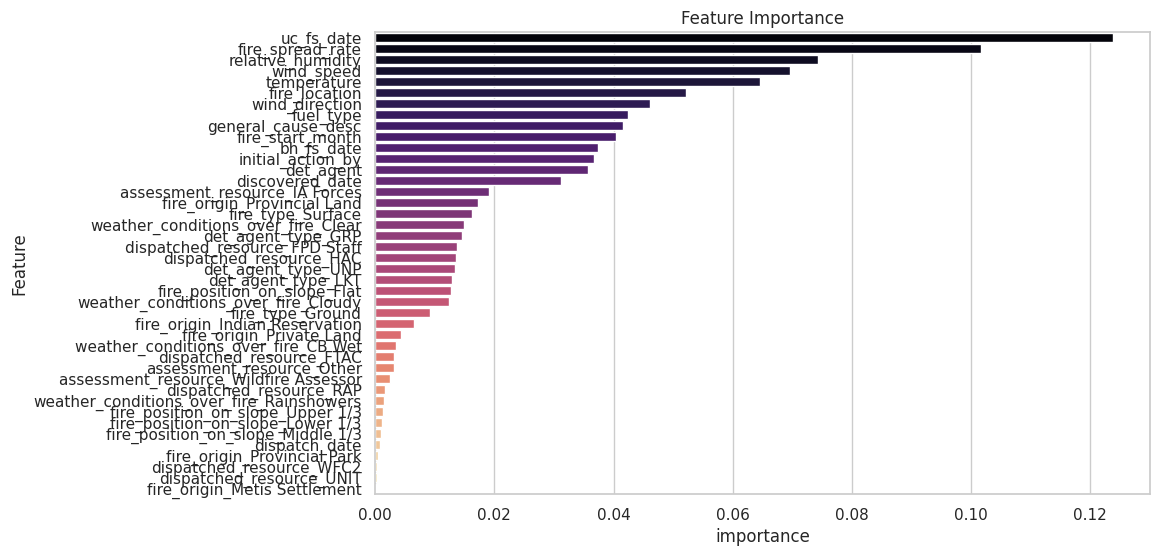

In [69]:
df_sorted = df.sort_values(by='importance', ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data = df_sorted, x='importance', y='feature', palette="magma", orient='h')

plt.xlabel("importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()

## F1 Score

In [75]:
from sklearn.metrics import f1_score

Decision Tree

In [71]:
# probabilities
dt_3_proba = dt_3.predict_proba(valid_X)

#predictions
dt_3_pred = dt_3.predict(valid_X)

# data frame of predictions
dt_3_result = pd.DataFrame({'actual' : valid_y,
                             'predicted': dt_3_pred,
                             'p_0': [p[0] for p in dt_3_proba],
                             'p_1': [p[1] for p in dt_3_proba]})
dt_3_result

,actual,predicted,p_0,p_1
16889,B,B,0.112240,0.354881
531,B,B,0.112240,0.354881
6301,A,A,0.938668,0.043124
10775,B,A,0.938668,0.043124
13061,A,A,0.805159,0.140135
...,...,...,...,...
7454,C,B,0.112240,0.354881
13618,A,B,0.112240,0.354881
18037,C,B,0.112240,0.354881
986,B,B,0.112240,0.354881


In [113]:
dt_3_f1 = f1_score(dt_3_result['actual'], dt_3_result['predicted'], average='micro')*100

print("F1 Score:", dt_3_f1)

F1 Score: 69.42007797270955


Random Forest

In [73]:
# probabilities
rf_proba = rf.predict_proba(valid_X)

#predictions
rf_pred = rf.predict(valid_X)

# data frame of predictions
rf_result = pd.DataFrame({'actual' : valid_y,
                             'predicted': rf_pred,
                             'p_0': [p[0] for p in rf_proba],
                             'p_1': [p[1] for p in rf_proba]})
rf_result

,actual,predicted,p_0,p_1
16889,B,B,0.158,0.706
531,B,A,0.478,0.432
6301,A,A,1.000,0.000
10775,B,A,0.554,0.396
13061,A,A,0.926,0.074
...,...,...,...,...
7454,C,B,0.188,0.354
13618,A,B,0.154,0.590
18037,C,B,0.038,0.650
986,B,A,0.720,0.258


In [112]:
rf_f1 = f1_score(rf_result['actual'], rf_result['predicted'], average='micro')*100

print("F1 Score:", rf_f1)

F1 Score: 77.14424951267057


KNN

In [92]:
# probabilities
knn_proba = knn.predict_proba(valid_X)

#predictions
knn_pred = knn.predict(valid_X)

# data frame of predictions
knn_result = pd.DataFrame({'actual' : valid_y,
                             'predicted': knn_pred,
                             'p_0': [p[0] for p in knn_proba],
                             'p_1': [p[1] for p in knn_proba]})
knn_result

,actual,predicted,p_0,p_1
16889,B,B,0.0,0.5
531,B,A,1.0,0.0
6301,A,A,1.0,0.0
10775,B,A,0.5,0.5
13061,A,A,1.0,0.0
...,...,...,...,...
7454,C,B,0.0,0.5
13618,A,B,0.0,1.0
18037,C,C,0.0,0.0
986,B,A,1.0,0.0


In [111]:
knn_f1 = f1_score(knn_result['actual'], knn_result['predicted'], average='micro')*100
print("F1 Score:", knn_f1)

F1 Score: 64.8635477582846


Logistic Regression

In [90]:
# probabilities
log_2_proba = log_2.predict_proba(valid_X)

#predictions
log_2_pred = log_2.predict(valid_X)

# data frame of predictions
log_2_result = pd.DataFrame({'actual' : valid_y,
                             'predicted': log_2_pred,
                             'p_0': [p[0] for p in log_2_proba],
                             'p_1': [p[1] for p in log_2_proba]})
log_2_result

,actual,predicted,p_0,p_1
16889,B,A,0.499867,0.359979
531,B,A,0.663638,0.211118
6301,A,A,0.946737,0.033347
10775,B,A,0.914250,0.077118
13061,A,A,0.492909,0.269735
...,...,...,...,...
7454,C,B,0.267366,0.462639
13618,A,B,0.209571,0.730209
18037,C,D,0.011864,0.231154
986,B,A,0.599566,0.238100


In [110]:
log_2_f1 = f1_score(log_2_result['actual'], log_2_result['predicted'], average='micro')*100
print("F1 Score:", log_2_f1)

F1 Score: 71.90545808966863


Gradient Boosting

In [95]:
# probabilities
grb_proba = grb.predict_proba(valid_X)

#predictions
grb_pred = grb.predict(valid_X)

# data frame of predictions
grb_result = pd.DataFrame({'actual' : valid_y,
                             'predicted': grb_pred,
                             'p_0': [p[0] for p in grb_proba],
                             'p_1': [p[1] for p in grb_proba]})
grb_result

,actual,predicted,p_0,p_1
16889,B,B,0.120050,0.569537
531,B,B,0.151110,0.654030
6301,A,A,0.987314,0.004000
10775,B,A,0.775548,0.199550
13061,A,A,0.905027,0.081865
...,...,...,...,...
7454,C,B,0.098865,0.415569
13618,A,B,0.196432,0.445016
18037,C,C,0.054810,0.377631
986,B,A,0.541773,0.398566


In [109]:
grb_f1 = f1_score(grb_result['actual'], grb_result['predicted'], average='micro')*100
print("F1 Score:", grb_f1)

F1 Score: 74.29337231968812


In [116]:
# F1 Score Summary
data = {'Model': ['Decision Tree', 'Random Forest', 'KNN', 'Logistic Regression', 'GradientBoost'],
        'F1 Score': [dt_3_f1, rf_f1, knn_f1, log_2_f1, grb_f1]}

f1_score_comparison = pd.DataFrame(data)

<Figure size 1000x500 with 0 Axes>

Text(0, 0.5, 'F1 Score')

Text(0.5, 0, 'Model')

Text(0, 69.44007797270955, '69.42%')

Text(1, 77.16424951267057, '77.14%')

Text(2, 64.88354775828459, '64.86%')

Text(3, 71.92545808966862, '71.91%')

Text(4, 74.31337231968811, '74.29%')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Decision Tree'),
  Text(1, 0, 'Random Forest'),
  Text(2, 0, 'KNN'),
  Text(3, 0, 'Logistic Regression'),
  Text(4, 0, 'GradientBoost')])

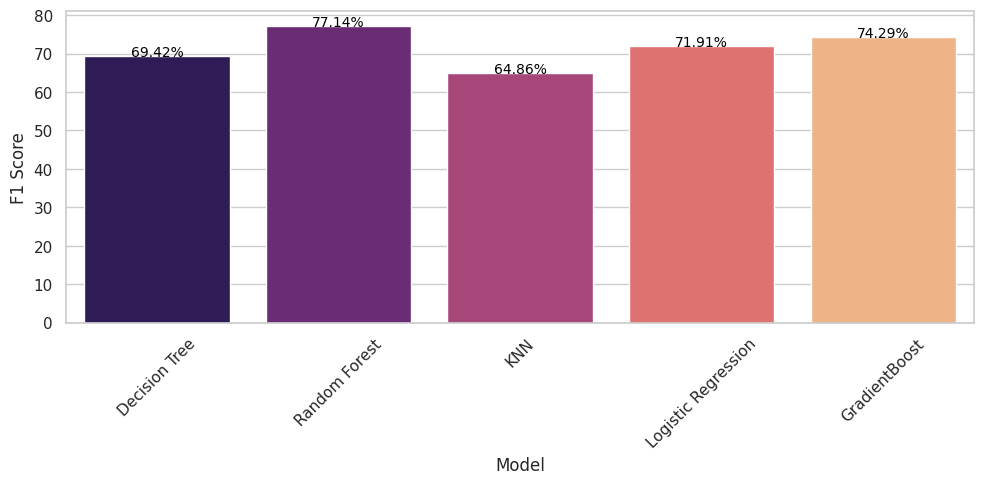

In [118]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
plt.ylabel("F1 Score")
plt.xlabel("Model")

barplot = sns.barplot(x='Model', y='F1 Score', data=f1_score_comparison, palette='magma')

for index, row in f1_score_comparison.iterrows():
    barplot.text(index, row['F1 Score'] + 0.02, f'{row["F1 Score"]:.2f}%', ha='center', va='baseline', fontsize=10, color='black')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## End of Modelling

Recommendation:<br>
- Take control of the wildfire situation as soon as possible to limit the rapid growth and possible damage.

- From April to September, strengthen the monitoring system in order to detect wildfires quickly and effectively. Provide sufficient staff and resources to ensure effective control.

- Allocate funds for the acquisition and maintenance of airborne firefighting equipment to improve wildfire response and control capabilities.

- Implement strict fire bans and restrictions during dry seasons. and foster a culture of fire safety and responsibility among residents.

- Identify coniferous areas and create accessible pathways to neighbouring water sources for successful firefighting.


Prepared by:
Jeriel Madamba